<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27921 entries, 0 to 27920
Data columns (total 18 columns):
 #   Column                                                                                                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                --------------  -----  
 0   Timestamp                                                                                                                                                                                                                             27921 non-null  object 
 1   How old are you?                                                                                             

<AxesSubplot: xlabel='annual_salary', ylabel='age'>

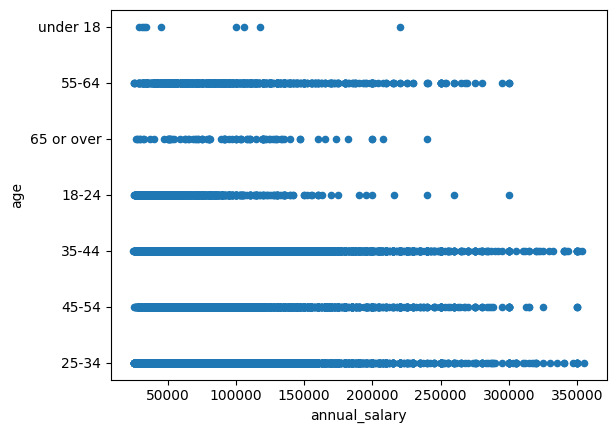

In [58]:
import pandas as pd


df2 = pd.read_csv('Datasets/salary_survey.csv')

#Inspecting the Dataset
df2.head(10)
df2.tail(10)
df2.columns
df2.shape
df2.info()
df2.describe()

#editing the column names to make them shorter
new_df = df2.rename(columns={"What is your annual salary? (You'll indicate the "\
        "currency in a later question. If you are part-time or hourly, please enter an "\
        "annualized equivalent -- what you would earn if you worked the job 40 hours a "\
        "week, 52 weeks a year.)" : 'annual_salary',
        "How much additional monetary compensation do you get, if any (for example, "\
        "bonuses or overtime in an average year)? Please only include monetary "\
        "compensation here, not the value of benefits." : 'additional_benefits',
        "Please indicate the currency" : 'currency',
        "If your job title needs additional context, please clarify here:" \
        : 'job_additional_context',
        "What industry do you work in?" : "work_industry",
        "How old are you?" : 'age',
        "What country do you work in?" : "country",
        "If you're in the U.S., what state do you work in?" : 'US_state',
        "What city do you work in?" : 'US_city',
        "How many years of professional work experience do you have overall?" \
        :"work_experience_years",
        "What is your highest level of education completed?" : 'degree',
        "What is your gender?" : 'gender',
        "What is your race? (Choose all that apply.)" : 'race',
        'Job title' : "Job_title"
        })
df2.columns = new_df.columns

#counting the number of unique values in the Dataset
df2.Timestamp.value_counts(dropna=False)
df2.age.value_counts(dropna=False)
df2.work_industry.value_counts(dropna=False)
df2.Job_title.value_counts(dropna=False)
df2.annual_salary.value_counts(dropna=False)
df2.additional_benefits.value_counts(dropna=False)
df2.country.value_counts(dropna=False)
df2.currency.value_counts(dropna=False)
df2.US_state.value_counts(dropna=False)
df2.US_city.value_counts(dropna=False)
df2.work_experience_years.value_counts(dropna=False)
df2.degree.value_counts(dropna=False)
df2.gender.value_counts(dropna=False)
df2.race.value_counts(dropna=False)


#Dropping column with lots of missing values
df2.drop(columns=['If "Other," please indicate the currency here: ', \
'If your income needs additional context, please provide it here:',\
'How many years of professional work experience do you have in your field?'],\
axis=1, inplace=True)
df2.drop(columns=['job_additional_context'], axis=1, inplace=True)
df2.tail(30)

#converting string object to datetime object
df2['Timestamp'] = pd.to_datetime(df2["Timestamp"])


#removing ',' from annual salary so i can convert it to integer object
df2['annual_salary'] = df2['annual_salary'].str.replace(',', '')

#converting the annual salary to int
df2['annual_salary'] = df2['annual_salary'].astype(int)
                          

#Removing outliers
a = df2['annual_salary'].quantile(0.021)
df2[df2['annual_salary'] > a].tail(60) 

aa = df2['annual_salary'].quantile(0.991) 
df2[df2['annual_salary'] < aa] 

df2 = df2[(df2['annual_salary'] > a) & (df2['annual_salary'] < aa)] 
df2.country.value_counts().head(60)

#cleaning all the mispelt USA in the country column
df2.country.value_counts(dropna=False)
df2['country'] = df2['country'].replace(['United States ', 'USA ', 'US', \
'United States', 'U.S.', 'USA', 'Usa', 'United States of America ', \
'United states', 'usa', 'united states', 'us', 'Us', 'U.S.A.', 'U.S',\
'United State', 'America', 'United Stated', 'U.S.A', 'The United States',\
'UNITED STATES', 'United States', 'United States of America', \
'United States of america', 'United Sates', 'Usa ', 'UnitedStates', \
'U. S. ', 'united States', 'US ', 'U.S. ', 'United States Of America',\
'United states ', '🇺🇸 ', 'Unites States', 'United State of America', \
'United Statea', 'U. S.', 'Us ', 'U.s.', 'ISA', 'United states of America',\
'united states ', 'Unites states ' ],
['USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', \
'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', \
'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', \
'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'USA' ])
df2.country.value_counts(dropna=False)


#cleaning all the mispelt canada in the country column
df2.country.value_counts(dropna=False)
df2['country'] = df2['country'].replace(['Canada', 'Canada ', 'CANADA', 'canada'],\
['Canada', 'Canada', 'Canada', 'Canada'])
df2.country.value_counts(dropna=False)

#cleaning all the mispelt UK in the coutry column
df2.country.value_counts(dropna=False)
name_replace_uk = ['United Kingdom', 'Uk', 'United Kingdom ', 'UK', 'United kingdom',\
'U.K. ', 'UK ', 'Uk ', 'united kingdom', 'uk', 'England', 'England ', 'Scotland, UK' ]
df2['country'] = df2['country'].replace(name_replace_uk, 'UK')
df2.country.value_counts(dropna=False)

df2.info()

#df2.to_csv('Job_Salary.csv', index = False)

df2.plot('annual_salary', 'age', kind='scatter')
